<a href="https://colab.research.google.com/github/JayedTamim/Thesis_model/blob/main/predict_covid_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [169]:
df = pd.read_csv('qt_dataset.csv',encoding='latin1')

In [170]:
df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


# New section

In [171]:
df.shape

(10000, 5)

In [172]:
df.tail()

,ID,Oxygen,PulseRate,Temperature,Result
9995,9995,95,124,97,Negative
9996,9996,88,70,100,Positive
9997,9997,99,56,105,Negative
9998,9998,92,49,98,Positive
9999,9999,85,52,99,Positive


In [173]:
df.isna().sum()

ID             0
Oxygen         0
PulseRate      0
Temperature    0
Result         0
dtype: int64

In [174]:
df=df.dropna()

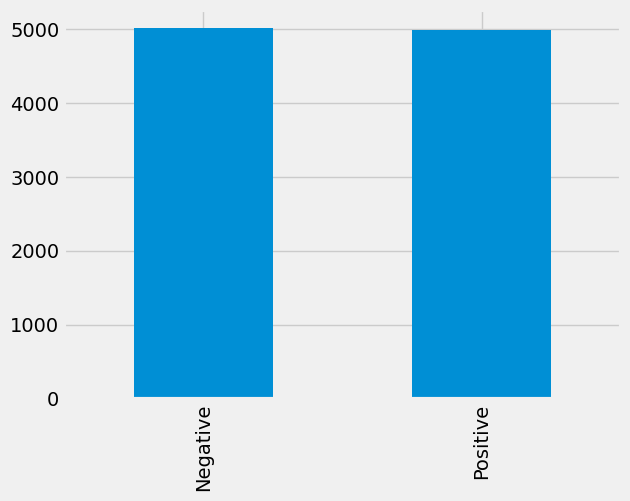

In [175]:
plt.style.use('fivethirtyeight')
df['Result'].value_counts().plot(kind='bar')
plt.show()

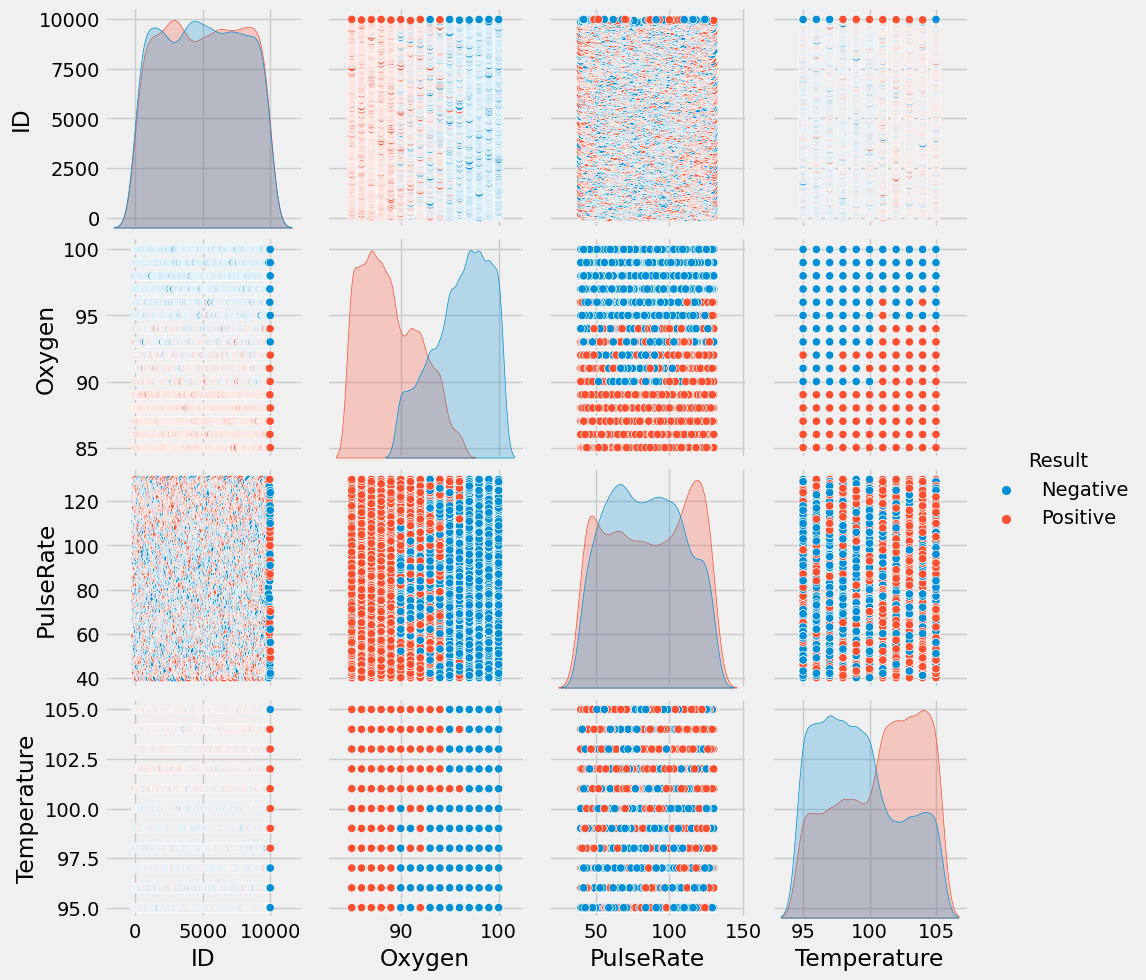

In [176]:
plt.style.use('fivethirtyeight')
sns.pairplot(data=df,hue='Result')
plt.show()

In [177]:
df['Result'].replace(['Positive','Negative'],[1,0],inplace=True)

In [178]:
df['Result'].unique()

array([0, 1])

In [179]:
x = df.drop('Result',axis=1)
y = df['Result']

In [180]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [181]:
x_train.shape

(7000, 4)

In [182]:
x_test.shape

(3000, 4)

In [183]:
y_train.shape

(7000,)

In [184]:
y_test.shape

(3000,)

In [185]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest model
model = RandomForestClassifier()

# Train the model using the training data
model.fit(x_train, y_train)



RandomForestClassifier()

In [186]:
model.score(x_test,y_test)

1.0

In [187]:
model.score(x_train,y_train)

1.0

In [188]:
y_pred = model.predict(x_test)

In [189]:
y_pred_train = model.predict(x_train)

In [190]:
test = confusion_matrix(y_pred,y_test)

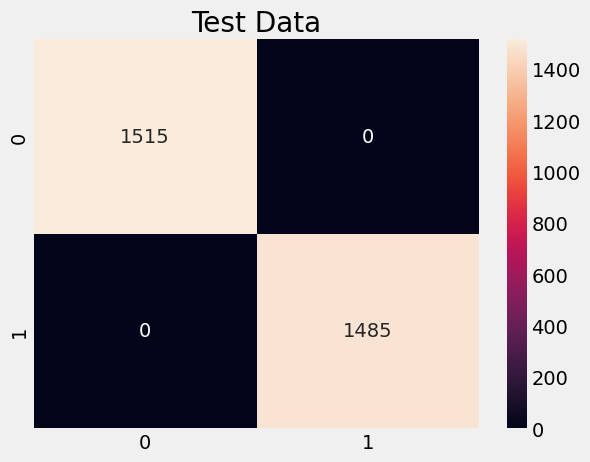

In [191]:
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

In [192]:
train = confusion_matrix(y_pred_train,y_train)

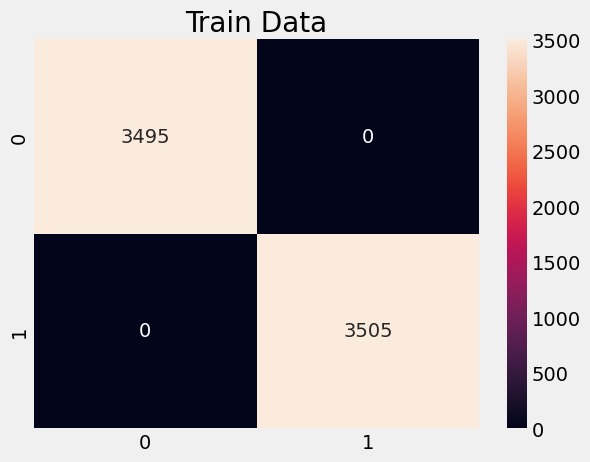

In [193]:
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()